<a href="https://colab.research.google.com/github/SamuelBenedix/jupyter-notebook/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Supervised Learning -- Classification**

Supervised Learning berguna untuk mengelompokan data berdasarkan kelas yang di deklarasikan. Kelas tersebut biasanya terdiri dari 2 kelas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(centers=2, random_state=0)
print('X ~ Jumlah Sample x dan Jumlah Fitur:', X.shape)
print('y ~ Jumlah Sample:', y.shape)

X ~ Jumlah Sample x dan Jumlah Fitur: (100, 2)
y ~ Jumlah Sample: (100,)


In [3]:
print(X[0])

[4.21850347 2.23419161]


In [4]:
print(y[0])

1


In [5]:
print('5 Data Pertama:\n', X[:5, :])

5 Data Pertama:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]


In [6]:
print('5 Label Pertama:', y[:5])

5 Label Pertama: [1 1 0 0 1]


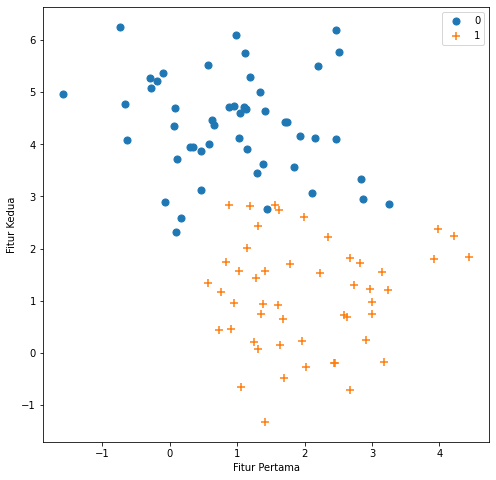

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, label='1',
            marker='+')

plt.xlabel('Fitur Pertama')
plt.ylabel('Fitur Kedua')
plt.legend(loc='upper right');


<img src="https://raw.githubusercontent.com/SamuelBenedix/summer_school_2018/master/03_sklearn/notebooks/figures/supervised_workflow.svg" width="50%">

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    stratify=y)

In [9]:
X_train[1]

array([1.3105127 , 0.07122512])

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
classifier = LogisticRegression()

In [12]:
X_train.shape

(75, 2)

In [13]:
y_train.shape

(75,)

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
prediction = classifier.predict(X_test)

In [16]:
print(prediction)
print(y_test)

[1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1]
[1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]


In [17]:
np.mean(prediction == y_test)

0.92

In [18]:
classifier.score(X_test, y_test)

0.92

In [19]:
classifier.score(X_train, y_train)

0.9466666666666667

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['tab:blue', 'tab:orange'],
                    alpha=0.5)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

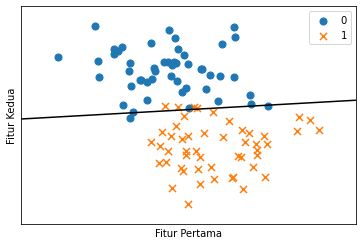

In [21]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, label='1', marker='x')

plt.xlabel("Fitur Pertama")
plt.ylabel("Fitur Kedua")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

In [22]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.25140039 -2.41961226]]
[6.1673817]


## **Klasifikasi Lainnya: K Nearest Neighbors**

Algoritma k-Nearest Neighbor adalah algoritma supervised 
learning dimana hasil dari instance yang baru diklasifikasikan berdasarkan mayoritas dari nilai terdekat

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

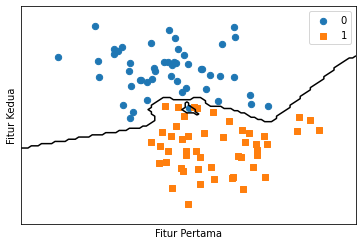

In [26]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', marker='s')

plt.xlabel("Fitur Pertama")
plt.ylabel("Fitur Kedua")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [27]:
knn.score(X_test, y_test)

1.0

In [28]:
knnPrediction = knn.predict(X_test)

In [29]:
print(knnPrediction)
print(y_test)

[1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
[1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1]
